import intake
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#p
url ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

import dask

dask.config.set(scheduler='threads')
dask.config.set(num_workers=20)  # Adjust based on your CPU coresl ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"


let us load the data

In [3]:
cat = intake.open_esm_datastore(url)
cat

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [4]:
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


let us extract cesm2 OMIP data from the main dataset.

In [5]:
cesm2 = cat.search(
    activity_id = 'OMIP',
    source_id = 'CESM2',
)
cesm2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190801
1,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,po4,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
2,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,phos,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
3,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,phos,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
4,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
...,...,...,...,...,...,...,...,...,...,...,...
59,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820
60,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820
61,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820
62,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,volcello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820


it seems that there are 2 separate member_ids, let us separate the two.

In [6]:
cesm2_1111 = cesm2.search(
    member_id = 'r1i1p1f1'
)
cesm2_1111.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190801
1,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,po4,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
2,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,phos,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
3,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,phos,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
4,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
5,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
6,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
7,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,o2sat,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
8,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,po4,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
9,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,mlotst,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802


In [7]:
cesm2_2111 = cesm2.search(
    member_id = 'r2i1p1f1'
)
cesm2_2111.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820
1,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820
2,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820
3,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,volcello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820
4,OMIP,NCAR,CESM2,omip1,r2i1p1f1,Ofx,volcello,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r2i1p1f...,NaN,20190820


In [8]:
cesm2_1111.unique()['variable_id']

['sftof',
 'po4',
 'phos',
 'ph',
 'o2sat',
 'mlotst',
 'intpp',
 'agessc',
 'dissic',
 'volcello',
 'intdic',
 'areacello',
 'hfds',
 'fgo2',
 'fgco2',
 'dpco2',
 'chl',
 'tauuo',
 'so',
 'pp',
 'tos',
 'o2',
 'no3',
 'msftmz',
 'uo',
 'tauvo',
 'vo',
 'wo',
 'zsatarag',
 'talk',
 'spco2',
 'thetao']

we can see that the variables available in r2 are also in r1, so we will only be using r1 moving forward.

we will also only be using gr, so let us filter that.

In [9]:
cesm2_filtered = cesm2_1111.search(
    grid_label = 'gr'
)
cesm2_filtered.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,phos,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
1,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
2,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
3,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,po4,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
4,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,intpp,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
5,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,agessc,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
6,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,dissic,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
7,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Ofx,volcello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
8,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,intdic,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
9,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802


Additionally, all of the table_id Ofx variables are constant, so we will also be filtering those out.

In [10]:
cesm2_filtered_2 = cesm2_filtered.search(
    table_id = 'Omon'
)
cesm2_filtered_2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,phos,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
1,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
2,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
3,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,po4,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
4,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,intpp,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
5,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,agessc,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
6,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,dissic,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
7,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,intdic,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
8,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,hfds,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
9,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,fgo2,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802


In [11]:
varlist = cesm2_filtered_2.unique()['variable_id']

let us now load all the actual data.

In [12]:
dset_dict = cesm2_filtered_2.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


{'OMIP.NCAR.CESM2.omip1.Omon.gr': <xarray.Dataset>
 Dimensions:           (member_id: 1, dcpp_init_year: 1, time: 3720, lev: 33,
                        lat: 180, lon: 360, d2: 2, lev_partial: 8)
 Coordinates:
   * lat               (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
     lat_bnds          (lat, d2) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
   * lev               (lev) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
     lev_bnds          (lev, d2) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
   * lon               (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
     lon_bnds          (lon, d2) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
   * time              (time) object 0001-01-15 13:00:00.999998 ... 0310-12-15...
     time_bnds         (time, d2) object dask.array<chunksize=(3720, 2), meta=np.ndarray>
   * member_id         (member_id) object 'r1i1p1f1'
   * dcpp_init_year    (dcpp_init_year) float64 nan
   *

In [13]:
cat['OMIP.NCAR.CESM2.omip1.Omon.gr'].df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version,_data_format_
0,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,phos,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
1,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
2,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
3,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,po4,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
4,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,intpp,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
5,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,agessc,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
6,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,dissic,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
7,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,intdic,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
8,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,hfds,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr
9,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,fgo2,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802,zarr


In [14]:
[key for key in dset_dict.keys()][:10]

['OMIP.NCAR.CESM2.omip1.Omon.gr']

In [15]:
data = dset_dict['OMIP.NCAR.CESM2.omip1.Omon.gr']
data

<xarray.Dataset>
Dimensions:           (member_id: 1, dcpp_init_year: 1, time: 3720, lev: 33,
                       lat: 180, lon: 360, d2: 2, lev_partial: 8)
Coordinates:
  * lat               (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds          (lat, d2) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev               (lev) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
    lev_bnds          (lev, d2) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
  * lon               (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon_bnds          (lon, d2) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time              (time) object 0001-01-15 13:00:00.999998 ... 0310-12-15...
    time_bnds         (time, d2) object dask.array<chunksize=(3720, 2), meta=np.ndarray>
  * member_id         (member_id) object 'r1i1p1f1'
  * dcpp_init_year    (dcpp_init_year) float64 nan
  * lev_partial       (lev_partial) float64 0.0 10.0 20.0 ... 75.0 100.0 125.0
    lev_partial_bnds  (lev_partial, d2) float64 dask.array<chunksize=(8, 2), meta=np.ndarray>
Dimensions without coordinates: d2
Data variables: (12/25)
    agessc            (member_id, dcpp_init_year, time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 11, 33, 180, 360), meta=np.ndarray>
    chl               (member_id, dcpp_init_year, time, lev_partial, lat, lon) float32 dask.array<chunksize=(1, 1, 48, 8, 180, 360), meta=np.ndarray>
    dissic            (member_id, dcpp_init_year, time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 11, 33, 180, 360), meta=np.ndarray>
    dpco2             (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    fgco2             (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    fgo2              (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    ...                ...
    talk              (member_id, dcpp_init_year, time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 11, 33, 180, 360), meta=np.ndarray>
    tauuo             (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    tauvo             (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    thetao            (member_id, dcpp_init_year, time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 11, 33, 180, 360), meta=np.ndarray>
    tos               (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    zsatarag          (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
Attributes: (12/53)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      OMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            0.0
    case_id:                          1541
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f1
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190802
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           OMIP.NCAR.CESM2.omip1.Omon.gr

In [16]:
data.data_vars.values()

ValuesView(Data variables:
    agessc    (member_id, dcpp_init_year, time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 11, 33, 180, 360), meta=np.ndarray>
    chl       (member_id, dcpp_init_year, time, lev_partial, lat, lon) float32 dask.array<chunksize=(1, 1, 48, 8, 180, 360), meta=np.ndarray>
    dissic    (member_id, dcpp_init_year, time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 11, 33, 180, 360), meta=np.ndarray>
    dpco2     (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    fgco2     (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    fgo2      (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    hfds      (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 385, 180, 360), meta=np.ndarray>
    intdic    (member_id, dcpp_init_year, time, lat, 

In [17]:
for var in data.data_vars.values():
    print(var.mean(dim=['lat','lon']).groupby('time.year').mean())

<xarray.DataArray 'agessc' (member_id: 1, dcpp_init_year: 1, year: 310, lev: 33)>
dask.array<transpose, shape=(1, 1, 310, 33), dtype=float32, chunksize=(1, 1, 1, 33), chunktype=numpy.ndarray>
Coordinates:
  * lev             (lev) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * year            (year) int64 1 2 3 4 5 6 7 8 ... 304 305 306 307 308 309 310
<xarray.DataArray 'chl' (member_id: 1, dcpp_init_year: 1, year: 310,
                         lev_partial: 8)>
dask.array<transpose, shape=(1, 1, 310, 8), dtype=float32, chunksize=(1, 1, 1, 8), chunktype=numpy.ndarray>
Coordinates:
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * lev_partial     (lev_partial) float64 0.0 10.0 20.0 ... 75.0 100.0 125.0
  * year            (year) int64 1 2 3 4 5 6 7 8 ... 304 305 306 307 308 309 310
<xarray.DataArray 'dissic' (member_id: 1, dcpp_

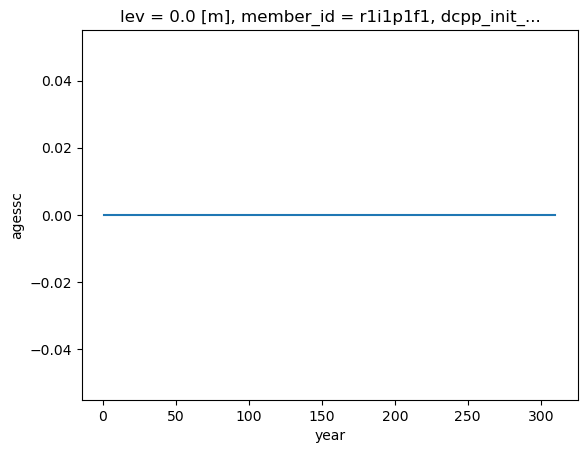

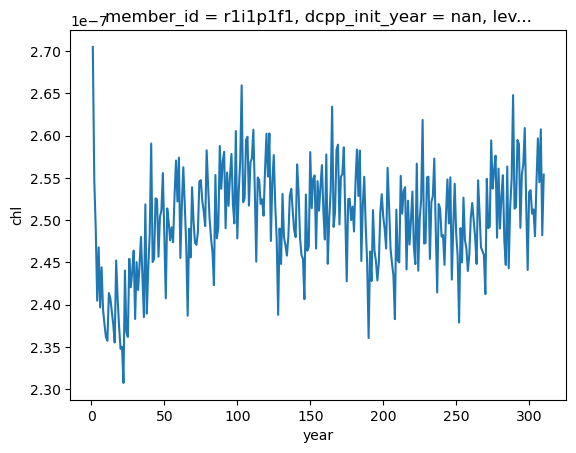

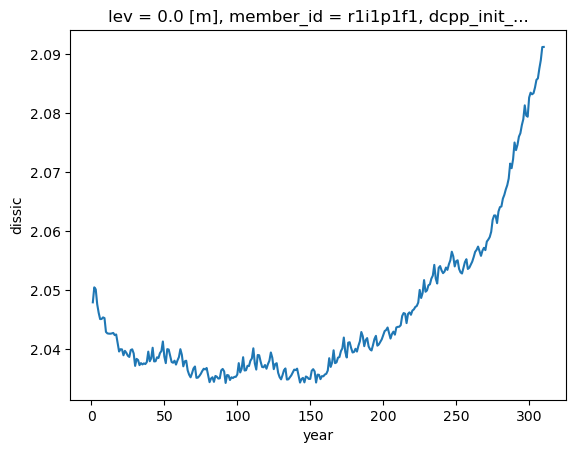

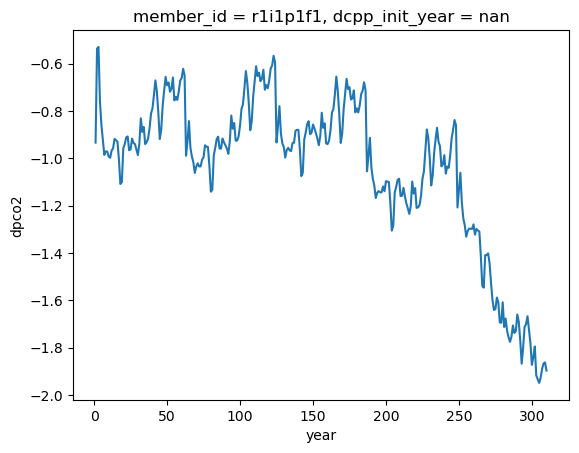

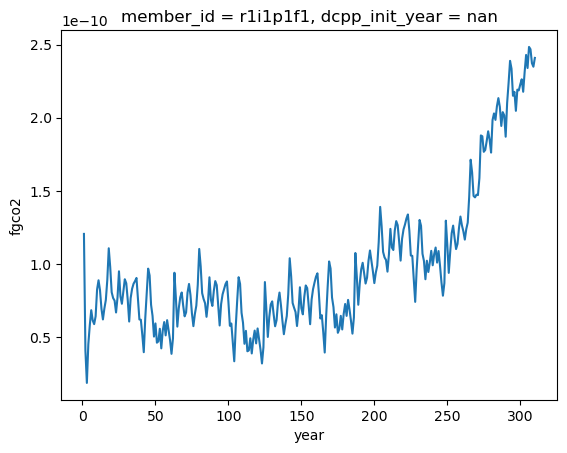

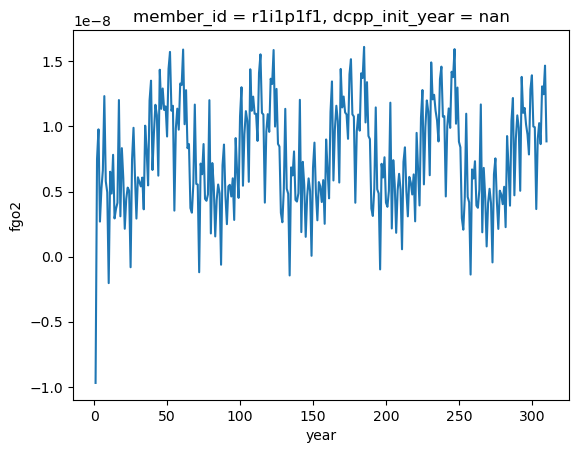

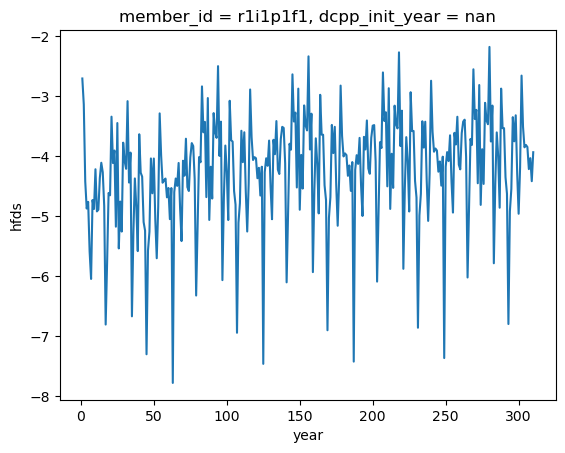

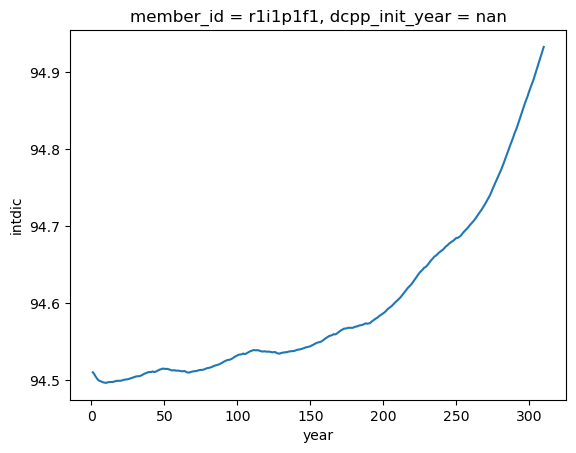

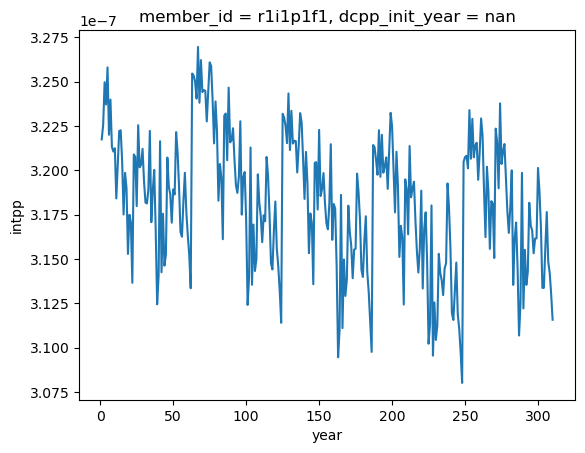

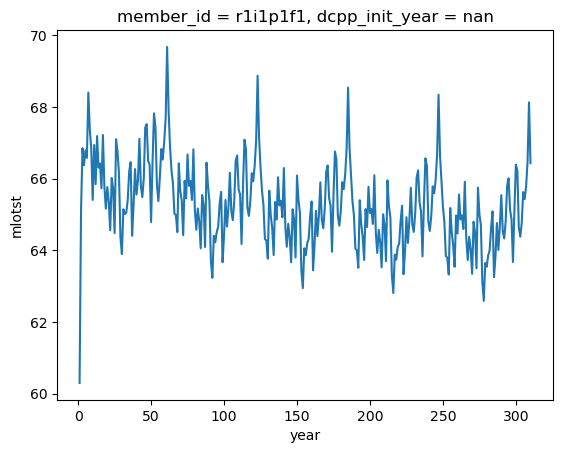

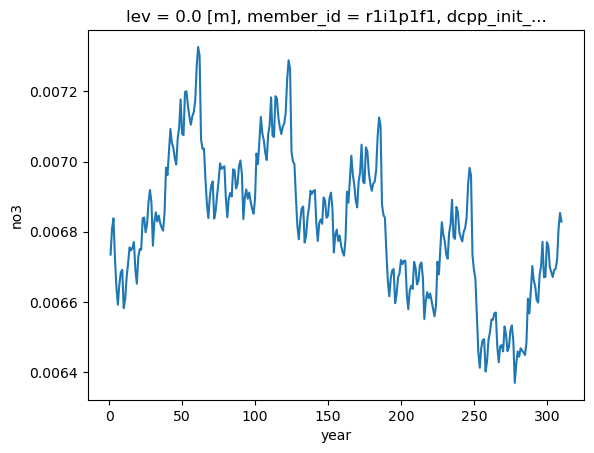

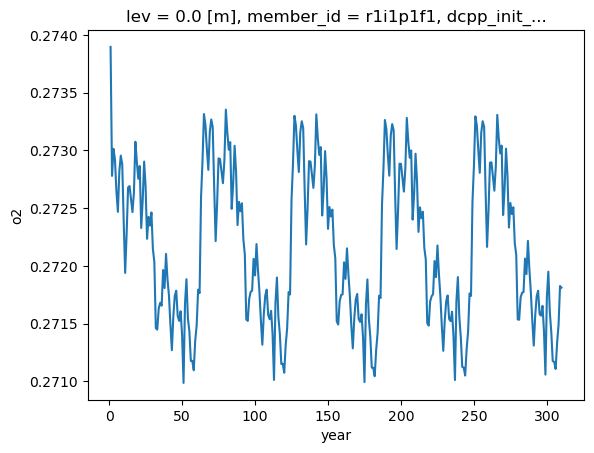

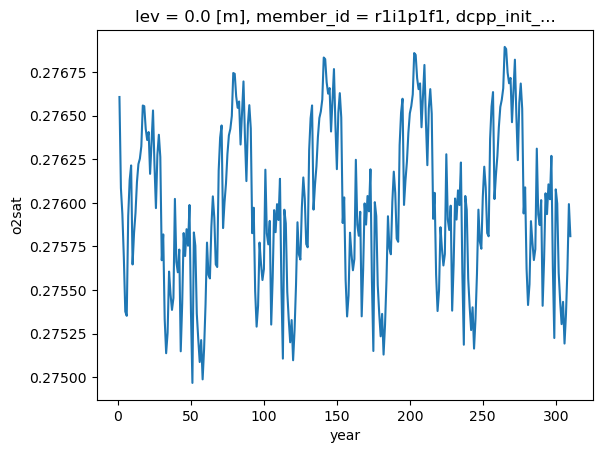

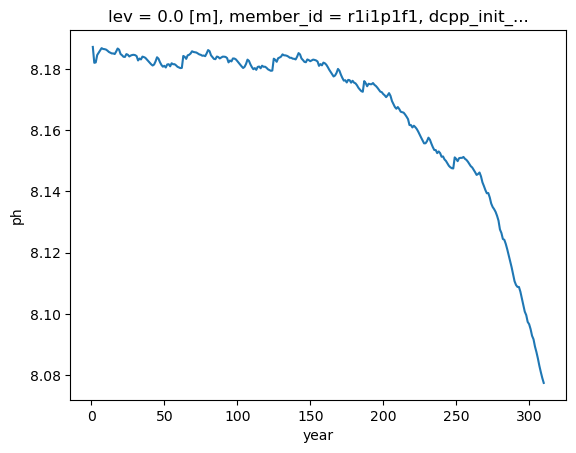

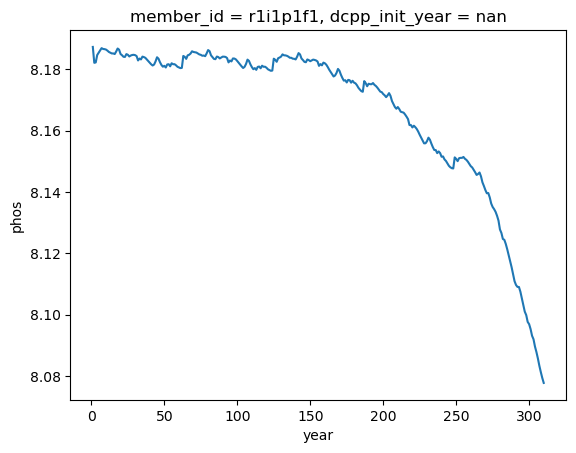

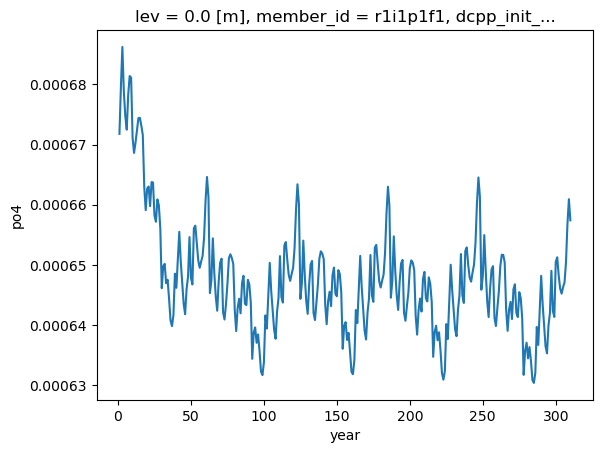

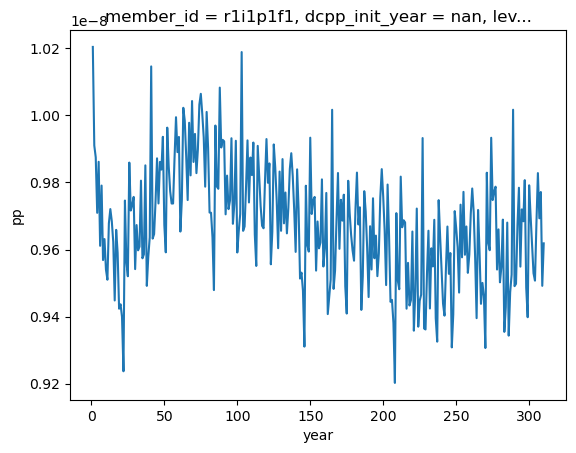

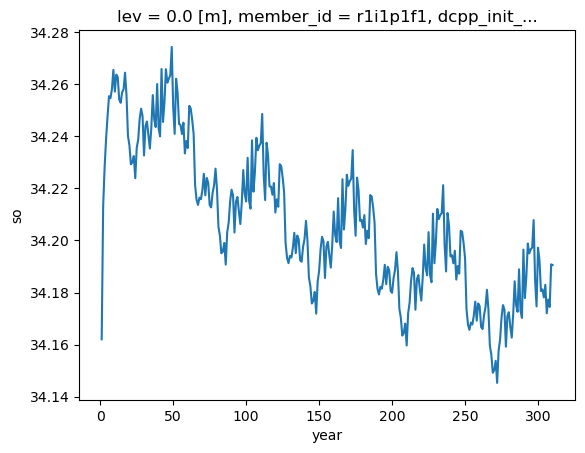

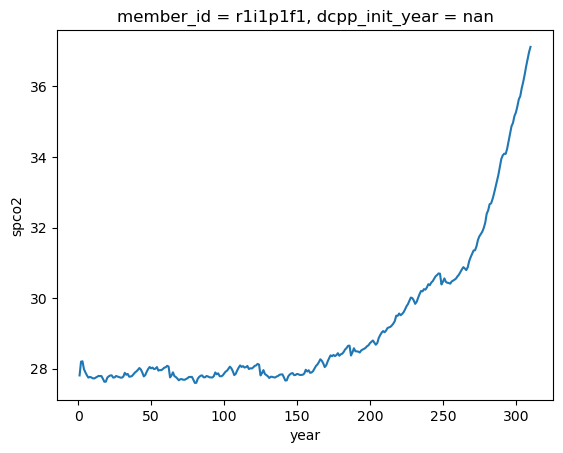

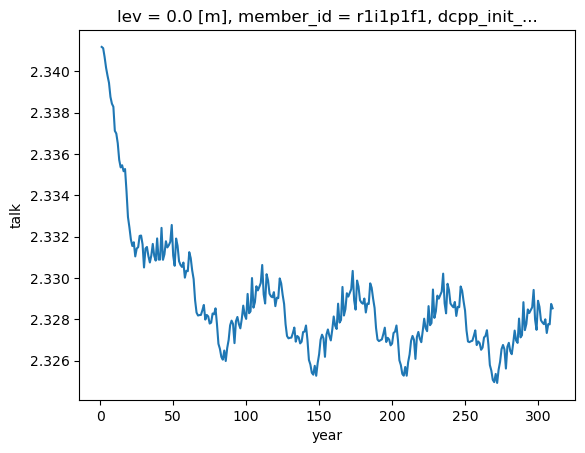

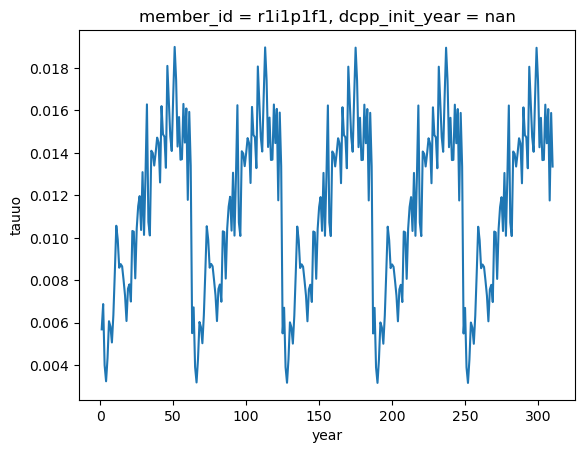

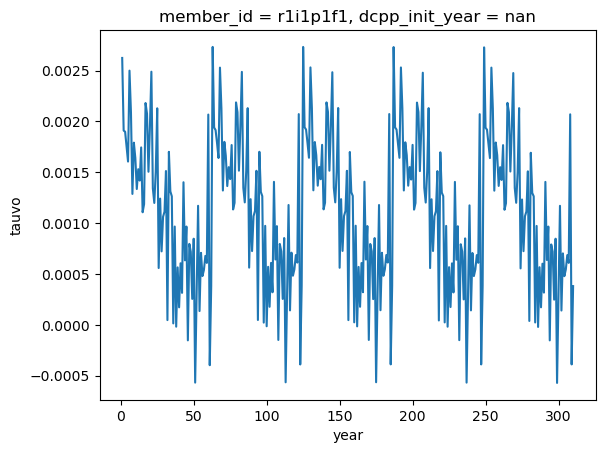

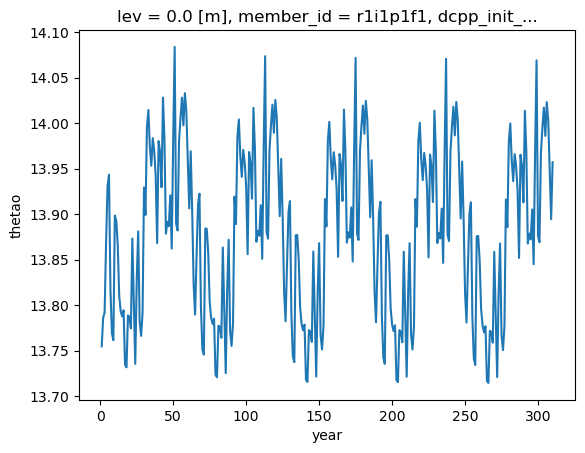

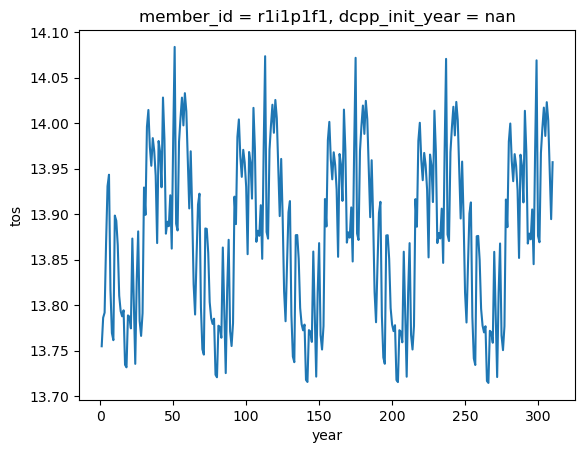

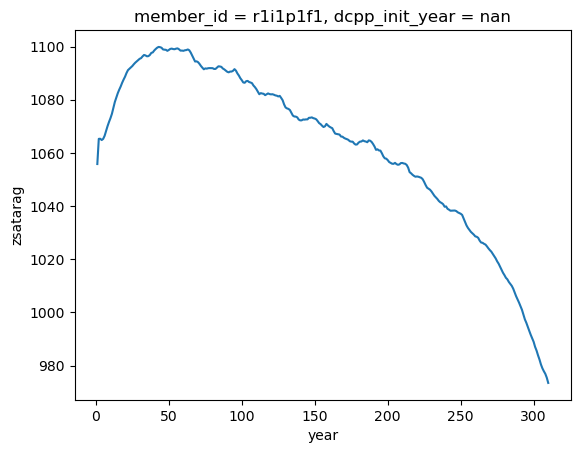

In [18]:
for var in data.data_vars.values():
    try:
        var.isel(lev=0).mean(dim=('lat','lon')).groupby('time.year').mean().plot()
        plt.show()
    except:
        try:
            var.isel(lev_partial=0).mean(dim=('lat','lon')).groupby('time.year').mean().plot()
            plt.show()
        except:
            var.mean(dim=('lat','lon')).groupby('time.year').mean().plot()
            plt.show()